In [7]:
def load_data():
    data_pth = 'allData/prognosis_mix_hb/pretreatment_response/merge_psychiatry_demo_dose_data.npy'
    label_pth = 'allData/prognosis_mix_hb/pretreatment_response/label_hamd.npy'
    data = np.load(data_pth)
    labels = np.load(label_pth)
    labels = change_hamd_to_percent(labels)
    return data, labels

data, label = load_data()
data.shape

(64, 10)

Current system is Ubuntu
[-0.24       -0.33333333 -0.25925926 -0.25        0.58823529  0.5
  0.13333333  0.38095238 -0.13636364 -0.19047619 -0.28571429 -0.23809524
  0.52631579 -0.06666667 -0.56521739 -0.38095238  0.         -0.44444444
 -0.4         0.26315789 -0.66666667 -0.36       -0.86363636 -0.33333333
 -0.43333333 -0.76       -0.5        -0.16666667 -0.42307692 -0.25
 -0.04347826  0.125      -0.25       -0.25       -0.08333333 -0.08
 -0.36363636 -0.04761905 -0.6875     -0.5483871  -0.03846154 -0.56521739
  0.          0.16666667 -0.13043478 -0.61904762  0.06666667 -0.71428571
 -0.56521739 -0.34615385  0.33333333  0.63157895 -0.375       0.6
 -0.125      -0.5        -0.53846154 -0.17647059  0.14285714  0.5
 -1.          0.         -0.25       -0.31578947]
SVR - MSE: 0.13500363096352058
Decision Tree - MSE: 0.3244979170029393


No handles with labels found to put in legend.


XGBoost - MSE: 0.1769011149147483
Random Forest - MSE: 0.13890756682232508


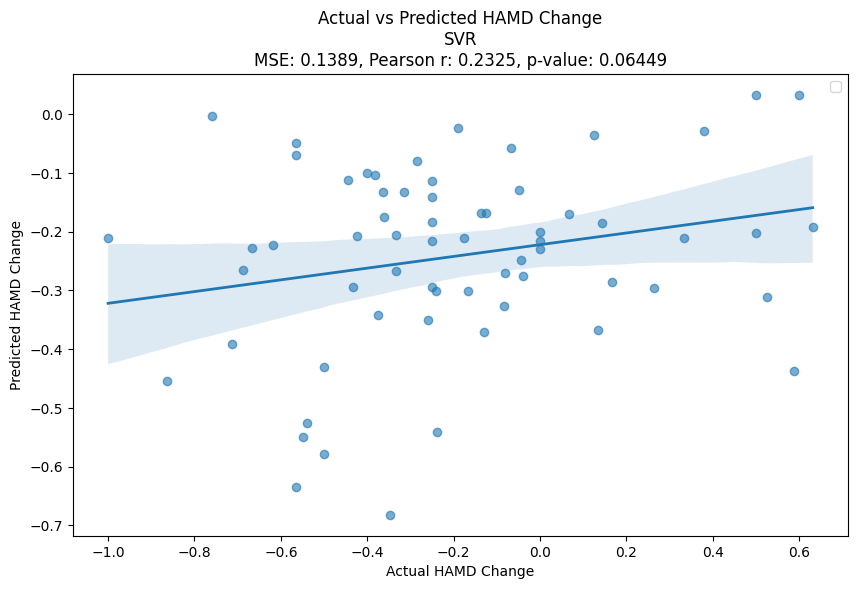

No handles with labels found to put in legend.


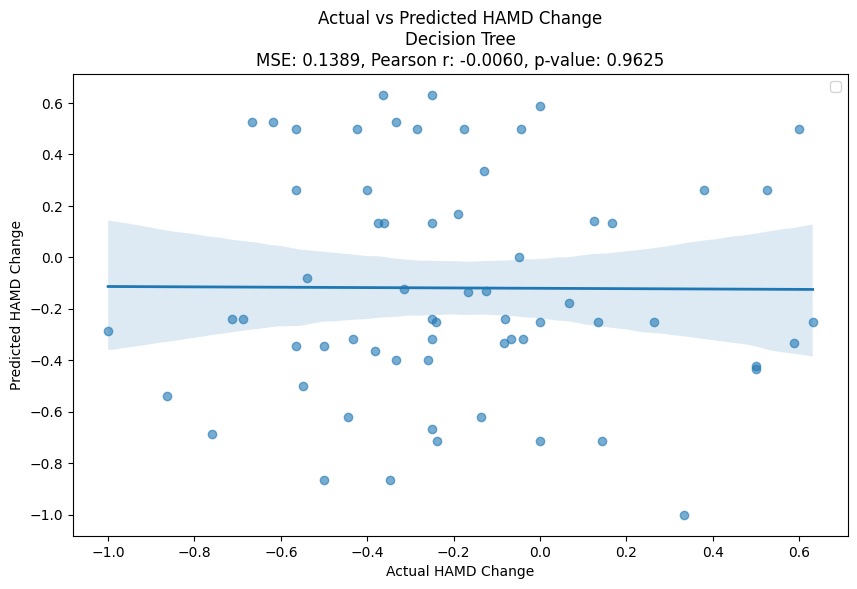

No handles with labels found to put in legend.


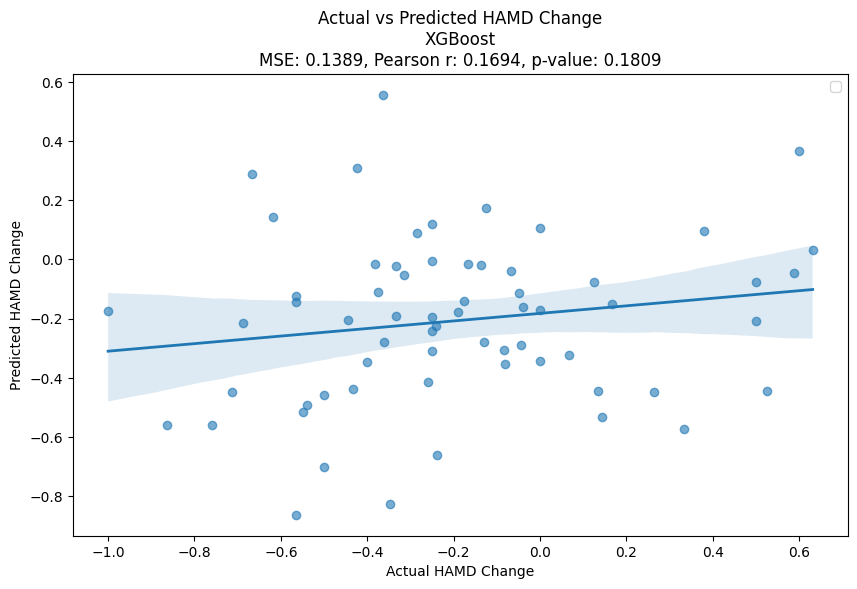

No handles with labels found to put in legend.


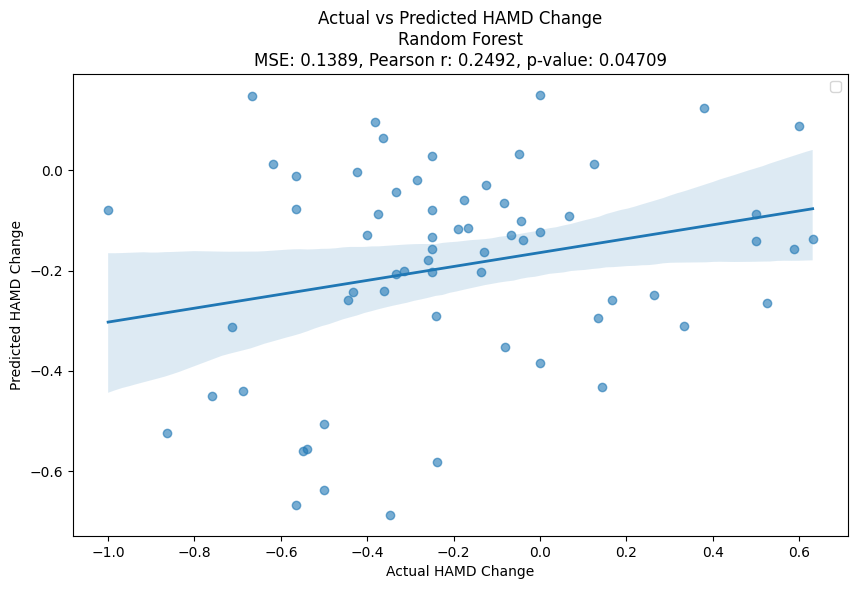

In [8]:
import numpy as np 
import os 
import sys 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold, cross_val_predict
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from scipy.stats import pearsonr

def set_path():
    if sys.platform == 'darwin':
        print("Current system is macOS")
        main_fold_path = '/Users/shanxiafeng/Documents/Project/Research/fnirs-prognosis/code/fnirs-treatment-response-prediction'
    elif sys.platform == 'linux':
        print("Current system is Ubuntu")
        main_fold_path = '/home/jy/Documents/fnirs/treatment_response/fnirs-depression-deeplearning'
    else:
        print("Current system is neither macOS nor Ubuntu")
    os.chdir(main_fold_path)

def change_hamd_to_percent(labels):
    res = labels[:, 1] - labels[:, 0]
    res = res / labels[:, 0]
    return res 

def load_data():
    data_pth = 'allData/prognosis_mix_hb/pretreatment_response/merge_psychiatry_demo_dose_data.npy'
    label_pth = 'allData/prognosis_mix_hb/pretreatment_response/label_hamd.npy'
    data = np.load(data_pth)
    labels = np.load(label_pth)
    labels = change_hamd_to_percent(labels)
    return data, labels

def regression(data, labels):
    # Define the regressors
    regressors = {
        "SVR": SVR(),
        "Decision Tree": DecisionTreeRegressor(),
        "XGBoost": XGBRegressor(),
        "Random Forest": RandomForestRegressor()
    }

    # Define the cross-validation strategy
    cv = KFold(n_splits=5, shuffle=True, random_state=42)

    # Perform regression using each regressor with cross_val_predict
    predictions = {}
    for name, reg in regressors.items():
        preds = cross_val_predict(reg, data, labels, cv=cv)
        predictions[name] = preds
        mse = mean_squared_error(labels, preds)
        print(f"{name} - MSE: {mse}")

    # Plot the actual vs predicted values
    for name, preds in predictions.items():
        plt.figure(figsize=(10, 6))
        sns.regplot(x=labels, y=preds, scatter_kws={'alpha':0.6}, line_kws={"linewidth":2})

        # Calculate Pearson correlation
        r, p_value = pearsonr(labels, preds)
        plt.title(f'Actual vs Predicted HAMD Change\n{name}\nMSE: {mse:.4f}, Pearson r: {r:.4f}, p-value: {p_value:.4g}')
        plt.xlabel('Actual HAMD Change')
        plt.ylabel('Predicted HAMD Change')
        plt.legend()
        plt.show()

if __name__ == "__main__":
    # Change the working directory to the main folder
    set_path()
    
    # Load the data
    data, labels = load_data()
    print(labels)
    
    # Perform regression and plot results
    regression(data, labels)
